***Question 1***

The theoretical Simple Linear Regression model describes a relationship between a predictor variable (X) and an outcome variable (Y). It involves:

* **Predictor (X):** A known variable.
* **Outcome (Y):** A value that depends on X.
* **Slope (β1)** and **Intercept (β0):** Fixed values defining the expected change in Y based on X.
* **Error Term (ε):** A random variable introducing variation around the true regression line.

The model assumes that Y is generated by a linear combination of X, the model's parameters (β0 and β1), and a random error term (ε).

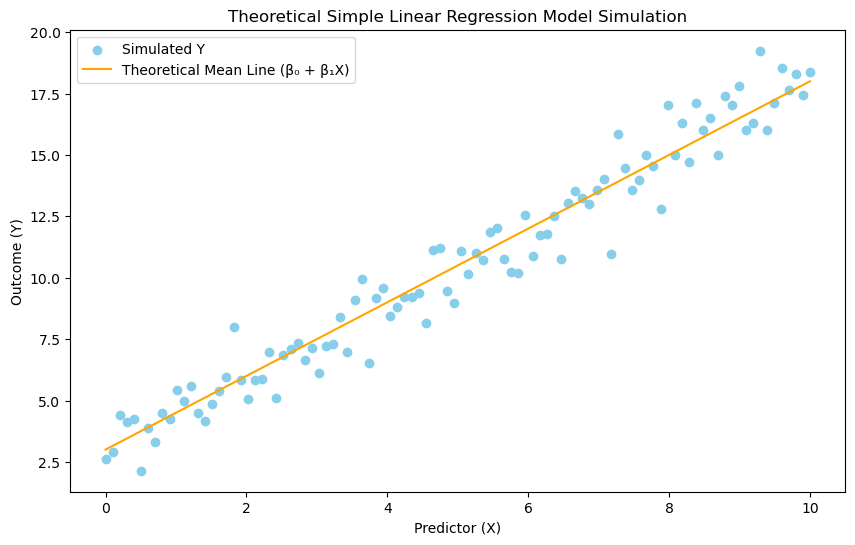

In [9]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Setting the model's true parameters
beta_0 = 3      # Intercept
beta_1 = 1.5    # Slope
sigma = 1       # Standard deviation of the error term

# Generating a range of X values as predictors
n = 100  # Number of samples
X = np.linspace(0, 10, n)

# Using the SLR theoretical model to calculate the mean of Y for each X
mean_Y = beta_0 + beta_1 * X

# Simulating Y as samples from a normal distribution with mean `mean_Y` and variance `sigma^2`
Y = norm.rvs(loc=mean_Y, scale=sigma)

# Plotting the simulated data
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color="skyblue", label="Simulated Y")
plt.plot(X, mean_Y, color="orange", label="Theoretical Mean Line (β₀ + β₁X)")
plt.xlabel("Predictor (X)")
plt.ylabel("Outcome (Y)")
plt.title("Theoretical Simple Linear Regression Model Simulation")
plt.legend()
plt.show()

### Summary of Exchanges

https://chatgpt.com/share/67254ac3-7fe8-8013-9cd9-6adadba95a16

1. **Initial Explanation of SLR Model**: 
   - We started by breaking down the theoretical components of the Simple Linear Regression model. This included:
     - **Predictor (X)**: Independent variable influencing the outcome.
     - **Outcome (Y)**: Dependent variable affected by X.
     - **Slope (β1)** and **Intercept (β0)**: Defined how much Y changes with X and the value of Y when X is zero, respectively.
     - **Error Term (ε)**: Random variability, normally distributed with a mean of zero and variance σ^2.
   - We outlined that SLR assumes Y values are sampled from a normal distribution centered around β0 + β1X, with deviations due to ε.

2. **Focus on Theoretical Model Without Fitting**:
   - You clarified that the question was not about fitting the model (e.g., calculating coefficients from data), but rather understanding how the theoretical SLR model defines Y as a sample from a distribution around the regression line.

3. **Simulation Code and Explanation**:
   - I provided Python code that uses **numpy** and **scipy.stats** to simulate the theoretical SLR model. This code:
     - Set parameters (β0, β1, and σ) as fixed values.
     - Generated Y values for various X by sampling from N(β0 + β1X, σ^2).
     - Plotted Y values and the "true" regression line, visually demonstrating how each Y is a sample from the normal distribution defined by the theoretical model.

***Question 2***

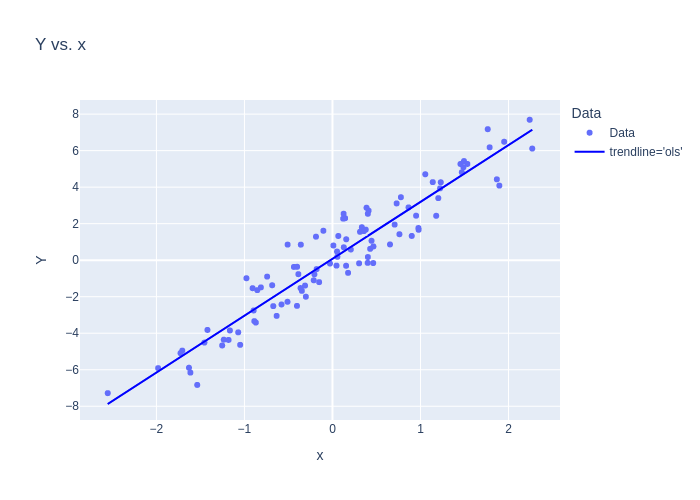

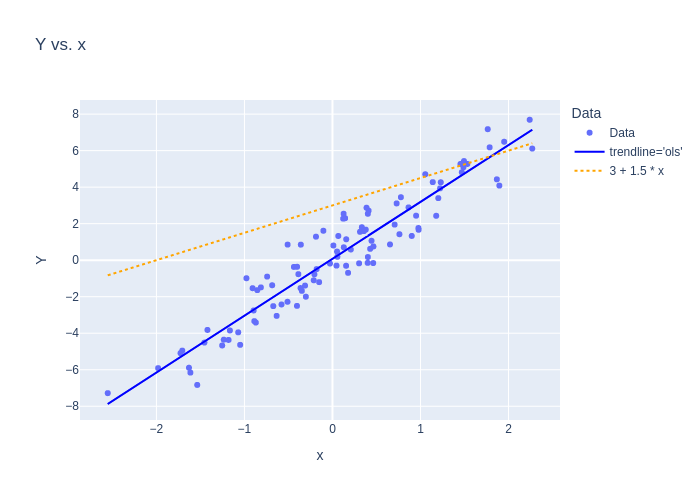

In [11]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf  # provides tools for fitting statistical models,
                                       #including regression models, with formulas similar to those in R.
import plotly.express as px  # this is a plotting library

# Step 1: Simulate some data for x and Y based on a theoretical Simple Linear Regression model
np.random.seed(0)  # for reproducibility
x = np.random.normal(0, 1, 100)  # 100 data points from a normal distribution
Y = 3 * x + np.random.normal(0, 1, 100)  # Linear relation with some noise

# Step 2: Combine x and Y into a pandas DataFrame
df = pd.DataFrame({"x": x, "Y": Y})

# Step 3: Specify and fit the model
model_data_specification = smf.ols("Y ~ x", data=df) 
fitted_model = model_data_specification.fit()

# Explanation:
# The line `model_data_specification = smf.ols("Y ~ x", data=df)` 
# specifies the Simple Linear Regression model formula "Y ~ x".

# This formula indicates that `Y` is the dependent variable and `x` is the independent variable.

# The `fitted_model = model_data_specification.fit()` line fits the model to the data, 
# finding the best-fit line for `Y` given `x`.

# Checking model output
fitted_model.summary()  #provides a detailed summary of the regression results, 
                        #including coefficient estimates, p-values, and statistical tests.

fitted_model.summary().tables[1]  #outputs the table with coefficients, standard errors, and t-values 
                                  #for each term in the model, including the intercept and the slope for `x`.

fitted_model.params  #gives the estimated coefficients of the regression model (intercept and slope for `x`).

fitted_model.params.values  #provides the coefficients as an array, which may be useful for 
                            #further calculations or model assessment.

fitted_model.rsquared  #outputs the R-squared value, which represents the proportion of variance 
                       #in `Y` explained by the model.

# Step 4: Create a plot
df['Data'] = 'Data'  # hack to add 'Data' as a legend label in the plot

# Create scatter plot with trendline
fig = px.scatter(df, x='x', y='Y', color='Data', 
                 trendline='ols', title='Y vs. x')

# Custom trendline
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

# Display the plot
fig.show(renderer="png")

# what does this add onto the figure in constrast to `trendline='ols'`?
x_range = np.array([df['x'].min(), df['x'].max()])
beta0 = 3      # Intercept
beta1 = 1.5    # Slope
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta0)+' + '+str(beta1)+' * x', 
                line=dict(dash='dot', color='orange'))

fig.show(renderer="png")

### Summary of Exchanges

https://chatgpt.com/share/67254cc6-80f0-8013-b958-10a6ef1af159

1. **Library Explanation**: We clarified that `statsmodels.formula.api` (imported as `smf`) is used for specifying and fitting statistical models in Python, using formulas similar to those in R. `plotly.express` was introduced as a powerful plotting library, useful for creating interactive plots.

2. **Data Simulation**: We demonstrated how to simulate data for a Simple Linear Regression model by creating `x` values from a normal distribution, generating `Y` as a linear function of `x` with some added noise. We combined `x` and `Y` into a `pandas` DataFrame, `df`, with columns `"x"` and `"Y"`.

3. **Model Specification and Fitting**:
   - **Model Formula and Fitting Steps**: The code `model_data_specification = smf.ols("Y ~ x", data=df)` sets up a Simple Linear Regression model formula, while `fitted_model = model_data_specification.fit()` fits this model to the data.
   - **Explanation of Outputs**:
     - `fitted_model.summary()`: Produces a comprehensive summary of the regression analysis, including coefficients, standard errors, R-squared, and p-values.
     - `fitted_model.summary().tables[1]`: Extracts the table with coefficients, standard errors, and t-values for each model term, including intercept and slope.
     - `fitted_model.params`: Provides estimated coefficients for intercept and slope.
     - `fitted_model.params.values`: Returns coefficients as a numerical array.
     - `fitted_model.rsquared`: Outputs the R-squared value, indicating the proportion of variance in `Y` explained by the model.

4. **Plotting and Visualization**:
   - We used `plotly.express` to create a scatter plot of `x` vs. `Y`, adding `trendline='ols'` to fit and display the regression line automatically.
   - Additionally, we demonstrated `fig.add_scatter()` to customize and overlay a fitted trend line on the plot.

5. **Rendering Compatibility**: Finally, for compatibility with platforms like GitHub and MarkUs, we used `fig.show(renderer="png")` to ensure the plot displays correctly.

This walkthrough provides a complete guide on building, fitting, interpreting, and visualizing a Simple Linear Regression model with simulated data.

***Question 3***

**Question 1: Theoretical Mean Line**
* Represents the true, underlying relationship between X and Y as defined by the model's parameters (β0 and β1).
* It's a fixed line, not affected by random sampling.
* Shows the expected value of Y for any given X, without considering random variation.

**Question 2: Estimated Line (from OLS)**
* Represents the best-fit line calculated from a specific sample of data.
* It's influenced by random sampling variation, meaning it can change with different samples.
* It's our best guess of the true relationship based on the available data.

**Key Difference:**

The main difference lies in the impact of random sampling variation. The theoretical line is fixed and true, while the estimated line is subject to variation based on the specific sample used.

### Summary of Exchanges

https://chatgpt.com/share/672551b5-1494-8013-9884-99e16700f763

#### 1. **Simulation of Simple Linear Regression (SLR) Model**
   - We discussed simulating data based on a Simple Linear Regression (SLR) model. You generated a theoretical linear model with parameters \(\beta_0 = 3\) (intercept), \(\beta_1 = 1.5\) (slope), and \(\sigma = 1\) (standard deviation of error). 
   - You simulated values for \(Y\) by adding random error (noise) around the mean \(Y\) values, which were calculated using the SLR model equation (\(Y = \beta_0 + \beta_1 X + \epsilon\), with \(\epsilon \sim N(0, \sigma^2)\)).
   - A scatter plot of \(X\) and simulated \(Y\) values was generated along with a theoretical mean line, showing the expected relationship without noise.

#### 2. **Fitting and Plotting Linear Models**
   - You created a dataset where \(x\) values were sampled from a normal distribution, and \(Y\) was generated with a true relationship (intercept of 3, slope of 1.5, and some added noise).
   - Using Python’s `statsmodels` library, you specified and fit a linear regression model (formula `"Y ~ x"`) to estimate the relationship between \(Y\) and \(x\).
   - We explored output summary statistics from the fitted model, such as coefficients, standard errors, \(t\)-values, \(p\)-values, and \(R^2\) (explained variance), which help assess the model fit and the strength of the relationship.

#### 3. **Comparing Theoretical and Fitted Lines**
   - To visualize the model’s fit, you plotted a trendline using `plotly.express` with `trendline='ols'`, which added a regression line based on the sample data.
   - To contrast this estimated line with the true population relationship, you overlaid a dashed line representing the theoretical mean (using \(\beta_0 = 3\) and \(\beta_1 = 1.5\)), which is independent of sampling variation.
   - This comparison highlighted the distinction between the **true underlying relationship** (the theoretical line) and the **estimated relationship** (the trendline based on a specific sample), demonstrating how random sampling variation affects fitted models.

#### 4. **Key Concept: Impact of Sampling Variation**
   - We examined how the true theoretical line is fixed, representing the ideal relationship without error, while the estimated trendline reflects the best-fit line based on the sample data, which varies with different samples.
   - This discussion emphasized understanding the concept of sampling variability, where the observed data and resulting fitted line may differ from the theoretical relationship due to random sample noise. This concept is central to statistical inference, as it underscores the difference between population parameters (true values) and sample estimates (observed values).

***Question 4***

The `fitted_model.fittedvalues` are directly computed from the coefficient estimates in `fitted_model.summary().tables[1]`.

1. **Coefficient Extraction**:
   - The summary table, `fitted_model.summary().tables[1]`, provides the intercept hat{beta}_0 and slope hat{beta}_1 estimates for the regression model.
   - These coefficients are accessible via `fitted_model.params`, e.g., `fitted_model.params['Intercept']` for hat{beta}_0 and `fitted_model.params['X']` for hat{beta}_1.

2. **Fitted Values Calculation**:
   - The fitted values for each observation x_i are calculated using:
   
     hat{y}_i = hat{beta}_0 + hat{beta}_1 x_i
   
   - This calculation can be performed directly, but `fitted_model.fittedvalues` automates it by storing these values for each x_i.

3. **Summary**:
   - `fitted_model.summary().tables[1]` shows the estimated intercept and slope.
   - `fitted_model.fittedvalues` then stores hat{y}_i values, calculated using these coefficients.

Thus, `fitted_model.fittedvalues` represents the in-sample predictions based on the coefficients provided in `fitted_model.summary().tables[1]`.

### Summary of Interactions

https://chatgpt.com/share/672d4601-9230-8008-aaad-f334fd04e45a

1. **Understanding Fitted Values in Simple Linear Regression**:
   - You initially asked how `fitted_model.fittedvalues` are derived based on the summary statistics from a fitted model, specifically focusing on `fitted_model.summary().tables[1]` or `fitted_model.params`.
   - I explained that in simple linear regression, fitted values (\(\hat{y}_i\)) are obtained by plugging in the estimated intercept (\(\hat{\beta}_0\)) and slope (\(\hat{\beta}_1\)) from the model summary into the equation \(\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i\), where \(x_i\) is each data point's predictor value.

2. **Detailed Derivation Using Model Parameters**:
   - We discussed that `fitted_model.summary().tables[1]` provides the coefficients \(\hat{\beta}_0\) (intercept) and \(\hat{\beta}_1\) (slope), which are accessible via `fitted_model.params`.
   - I showed that by accessing these values (e.g., `fitted_model.params['Intercept']` for \(\hat{\beta}_0\) and `fitted_model.params['X']` for \(\hat{\beta}_1\)), you can manually compute the fitted values by applying the regression formula to each predictor value \(x_i\).

3. **Practical Calculation of Fitted Values**:
   - I explained that `fitted_model.fittedvalues` automatically performs this calculation for each observation in the dataset. It effectively calculates \( \hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i \) for all observations in a single step, storing the results as in-sample predictions.
   - Thus, `fitted_model.fittedvalues` directly derives from the estimated parameters presented in `fitted_model.summary().tables[1]` and provides the predicted values based on those coefficients.

4. **Explicit Illustration of Summary and Calculation**:
   - Finally, I provided an explicit summary of how the fitted values are computed from `fitted_model.summary().tables[1]`, illustrating that:
      - The first row of this table represents the intercept,
      - The second row represents the slope,
      - `fitted_model.fittedvalues` then uses these values to predict \(\hat{y}_i\) for each \(x_i\) in the data.

***Question 5***

In the **ordinary least squares** (OLS) method, the line chosen minimizes the **sum of squared residuals**, where a residual is the vertical distance between an observed point and the fitted line.

Here’s why squaring is used and its role:

1. **Purpose of Squaring Residuals**: Squaring each residual:
   - **Prevents cancellation** of positive and negative residuals, so both under- and overpredictions contribute positively to the total error.
   - **Penalizes larger deviations** more heavily, highlighting significant errors.

2. **Optimal Fit**: Minimizing the sum of squared residuals gives the line with the least overall prediction error, making it the best fit that captures the trend in the data.

3. **Visual Insight**: In visualization, residuals are represented by red dashed lines between data points and the trend line. The OLS trend line minimizes the total length of these squared lines, ensuring a close fit to all points.

Squaring residuals ensures a balanced, accurate trend line that reflects the data’s overall pattern.

### Summary of Interactions

https://chatgpt.com/share/672d47d2-a970-8008-9ea0-cef3a62e7bd1

1. **Initial Question and Explanation**:  
   You provided a Python code snippet to generate a scatter plot with a trendline fit using "ordinary least squares" (OLS) and asked for a concise explanation of how OLS selects a line to fit the observed data. Specifically, you wanted an explanation focused on residuals, with no need for the explicit equations of the OLS estimators.

2. **Response from ChatGPT**:  
   I explained that the OLS method chooses a line that minimizes the sum of squared residuals, where a residual is the vertical distance between an observed data point and the predicted value on the trend line. I highlighted two main reasons for squaring these residuals:
   
   - **Avoiding cancellation of positive and negative residuals** so that all deviations contribute positively.
   - **Penalizing larger deviations** more heavily, which emphasizes the importance of minimizing larger errors.

   I noted that this minimization makes the OLS line the "best fit" for the overall data trend, as it minimizes the overall prediction error. Additionally, I referenced the visualization provided, pointing out that the red dashed lines in the plot represent residuals, and explained that OLS aims to minimize the total length of these squared residuals. This approach helps capture the data's general trend without favoring individual points excessively.

***Question 6***

1. **`1-((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum()`**:
   This formula for \( R^2 \) captures the proportion of variance in \( Y \) explained by the model. It compares the unexplained variation (sum of squared residuals) to the total variation (TSS), where a higher \( R^2 \) means better model fit.

2. **`fitted_model.rsquared`**:  
   This is the model’s \( R^2 \) value, calculated automatically by most statistical packages, indicating how well the model explains \( Y \)’s variability. Higher \( R^2 \) suggests a better model fit.

3. **`np.corrcoef(Y, fitted_model.fittedvalues)[0,1]**2`**:  
   This computes the square of the Pearson correlation between observed \( Y \) and predicted \( Y \). In simple linear regression, this squared correlation equals \( R^2 \), representing how closely predictions align with actual outcomes.

4. **`np.corrcoef(Y, x)[0,1]**2`**:  
   This calculates the square of the correlation between \( Y \) and the predictor \( x \). With a single predictor, this squared correlation also equals \( R^2 \), as \( x \) alone determines the explained variance.

### Summary of Interactions

https://chatgpt.com/share/672d4a9a-baac-8008-9cfe-e26e86bc90a6

In this interaction, we explored the concept of \( R^2 \) (coefficient of determination) in the context of simple linear regression, specifically addressing the following expressions:

1. **Proportion of Variation Explained by the Model**  
   - The expression \( 1 - \frac{\sum (Y - \text{fitted\_model.fittedvalues})^2}{\sum (Y - Y.mean())^2} \) was analyzed as the formula for \( R^2 \). This calculation shows how much of the variation in the outcome variable \( Y \) is explained by the model's predictions.
   - We discussed how the numerator represents the sum of squared residuals (unexplained variation), while the denominator represents the total sum of squares (total variation). Subtracting the proportion of unexplained variation from 1 gives the proportion of variance in \( Y \) explained by the model.

2. **`fitted_model.rsquared` as a Measure of Model Accuracy**  
   - We discussed how `fitted_model.rsquared` is an automatic calculation of \( R^2 \) in statistical modeling software. This value provides a quick measure of the model's accuracy in terms of its ability to explain the variation in \( Y \). A higher \( R^2 \) indicates a model that captures a greater proportion of \( Y \)'s variance.

3. **Interpretation of `np.corrcoef(Y, fitted_model.fittedvalues)[0,1]**2`**  
   - This expression calculates the square of the correlation between \( Y \) and the fitted (predicted) values. For simple linear regression, this squared correlation is equivalent to \( R^2 \). It quantifies how well the predicted values align with the observed \( Y \) values, representing the proportion of \( Y \)'s variance explained by the predictions.

4. **Interpretation of `np.corrcoef(Y, x)[0,1]**2`**  
   - This expression calculates the square of the correlation between \( Y \) and the predictor variable \( x \). In simple linear regression, where there is only one predictor, this squared correlation also equals \( R^2 \), as the single predictor’s linear relationship with \( Y \) fully determines the proportion of explained variance.

### Overall Concept of R^2 in Simple Linear Regression

Through our discussion, we clarified that in simple linear regression, these expressions are different ways to calculate or interpret \( R^2 \), the proportion of the variance in \( Y \) explained by the model. Each expression provides a perspective on how the model captures the variance in \( Y \), reflecting the accuracy and explanatory power of the model.

***Question 7***

### Linearity Assumption

For linearity, the relationship between `Amount of Fertilizer` (independent variable) and `Crop Yield` (dependent variable) should form a straight line. Using:

```python
fig1 = px.scatter(df, x='Amount of Fertilizer (kg)', y='Crop Yield (tons)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')
```

check if the data aligns with the trendline. If the points curve instead of aligning linearly, it suggests a non-linear relationship, indicating that a polynomial or non-linear model might fit better.

### Homoscedasticity Assumption

For constant variance of errors, plot residuals against fitted values:

```python
fig3 = px.scatter(df, x=y_hat, y=residuals,
                  title='Residuals vs. Fitted Values',
                  labels={'x': 'Fitted Values', 'y': 'Residuals'})
fig3.show(renderer="png")
```

If residuals show a "fan" or "cone" shape, the variance of errors isn’t constant, violating homoscedasticity. This suggests that adjustments to the model may be needed.

### Summary of Interactions

https://chatgpt.com/share/672d4e32-442c-8008-8cb3-f48f136a66f5

**Objective:**  
The goal was to analyze the compatibility of Simple Linear Regression (SLR) model assumptions with a provided dataset, examining the relationship between the amount of fertilizer (independent variable) and crop yield (dependent variable).

**Initial Analysis of Assumptions**  
We started by reviewing the fundamental assumptions of the SLR model:
1. **Linearity**: The relationship between the independent variable (fertilizer) and the dependent variable (crop yield) is linear.
2. **Independence of Errors**: Residuals should be independent.
3. **Homoscedasticity**: Residuals should have constant variance across the predictor’s range.
4. **Normality of Errors**: Residuals should be normally distributed.

**Identified Issues with the Dataset**  
After examining the dataset in the provided code, we noted specific violations of assumptions:

1. **Linearity Violation**  
   - The scatter plot of `Amount of Fertilizer` vs. `Crop Yield` (generated using `fig1`) suggested a potential non-linear trend in the data, which deviates from the linear relationship required by SLR. Specifically, the data points seemed to form a curve rather than aligning along a straight line, indicating that a linear model might not capture the relationship adequately.
   - We recommended considering a more complex model, such as polynomial regression, for a better fit.

2. **Homoscedasticity Violation**  
   - We discussed the importance of homoscedasticity, or constant variance of residuals. The residuals histogram (`fig2`) was included to help identify any apparent skew or uneven distribution.
   - Additionally, we recommended creating a **Residuals vs. Fitted Values** scatter plot to more directly observe homoscedasticity. This can be achieved by adding:
     ```python
     fig3 = px.scatter(df, x=y_hat, y=residuals,
                       title='Residuals vs. Fitted Values',
                       labels={'x': 'Fitted Values', 'y': 'Residuals'})
     fig3.show(renderer="png")
     ```
   - A "fan" or "cone" shape in this plot would indicate increasing or decreasing error variance with fitted values, confirming a violation of homoscedasticity. This would suggest that variance in crop yield increases with higher fertilizer levels, further supporting the need for a non-linear model.

**Conclusion**  
In summary, based on the observed violations of the linearity and homoscedasticity assumptions, we concluded that the simple linear regression model might not be suitable for this data. A more complex model, like polynomial regression, would likely better fit the non-linear relationship and address the observed non-constant variance in residuals.

***Question 8***

### Null Hypothesis ( H_0 )
The null hypothesis states that there is no linear association between `waiting` and `duration` on average. Mathematically, this can be stated as:

H_0: beta_1 = 0

where beta_1 represents the slope of the regression line, or the coefficient of `waiting`. Under H_0, we assume that the waiting time does not have a significant effect on the eruption duration.

### Alternative Hypothesis ( H_1 )
The alternative hypothesis suggests that there is a linear association between `waiting` and `duration`, meaning:

H_1: beta_1 ≠ 0

In [ ]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

### Conclusion
Assuming we observe a small p-value (less than 0.05), we conclude:
> "We reject the null hypothesis with a p-value of XYZ, meaning we have sufficient evidence to suggest a significant linear association between waiting time and eruption duration in the Old Faithful Geyser dataset." 

However, if the p-value is not sufficiently low, we say:
> "We fail to reject the null hypothesis, indicating that the evidence against no linear association between waiting time and eruption duration is not strong at our significance level."

### Summary of Interactions

https://chatgpt.com/share/672d5526-ac74-8008-92a2-46f478312180

**Initial Inquiry**:
You shared Python code to analyze the "Old Faithful Geyser" dataset. This included creating a scatter plot with a simple linear regression trendline using Plotly and adding a smoothed LOWESS trendline for further exploration. Additionally, you wanted a hypothesis test setup to assess the presence of a linear relationship between the waiting time (`waiting`) and eruption duration (`duration`) in the dataset.

**Objective**:
The objective was to determine if there is evidence of a significant linear association between `waiting` and `duration` using Simple Linear Regression. You requested clarification on hypothesis testing for this analysis and asked for guidance in interpreting the results.

**Summary of Analysis**:
1. **Plotting**:
   - You used Plotly to visualize the scatter plot of `waiting` vs. `duration` with an overlaid simple linear regression trendline to illustrate the general linear relationship. Additionally, a smoothed LOWESS trendline was added to observe non-linear trends in the data.

2. **Hypothesis Testing**:
   - We defined the null hypothesis (\( H_0 \)): "There is no linear association between `waiting` and `duration`," implying the slope coefficient (\( \beta_1 \)) is zero.
   - The alternative hypothesis (\( H_1 \)) was that a linear association does exist, meaning \( \beta_1 \neq 0 \).

3. **Linear Regression Model**:
   - You ran a linear regression model with `waiting` as the independent variable and `duration` as the dependent variable. We used the summary output to focus on the p-value associated with the slope (\( \beta_1 \)).
   - Interpretation was based on the p-value:
     - If the p-value is less than 0.05, we reject \( H_0 \) and conclude there is evidence of a significant linear association between `waiting` and `duration`.
     - If the p-value is greater than 0.05, we fail to reject \( H_0 \), indicating insufficient evidence for a linear association.

4. **Conclusion**:
   - Based on the p-value obtained, we discussed how to phrase the conclusion appropriately. If we reject \( H_0 \), you could state: "We reject the null hypothesis with a p-value of XYZ, meaning we have sufficient evidence to suggest a significant linear association between waiting time and eruption duration in the Old Faithful Geyser dataset."
   - If \( H_0 \) is not rejected, the conclusion would be: "We fail to reject the null hypothesis, indicating that the evidence against no linear association between waiting time and eruption duration is not strong at our significance level."

This approach allowed you to analyze the Old Faithful Geyser dataset, testing for linear association and understanding how to interpret and report the results. 

***Question 9***

1. **Hypotheses**:
   - **Null Hypothesis (H₀)**: There is no relationship between waiting time (`waiting`) and eruption duration (`duration`) for the subset of short wait times. In other words, the slope coefficient for `waiting` is zero in each subset (e.g., for waiting times <62, <64, and <66 minutes).
     - Mathematically: \( H_0: \beta_{\text{waiting}} = 0 \)
   - **Alternative Hypothesis (H₁)**: There is a relationship between waiting time and eruption duration for the subset of short wait times. The slope coefficient for `waiting` is not zero, indicating that waiting time has a statistically significant effect on eruption duration in each subset.
     - Mathematically: \( H_1: \beta_{\text{waiting}} \neq 0 \)
     
2. **Filter the Dataset for Short Wait Times**:
   - For each of the short wait time limits (62, 64, and 66 minutes), we filter the dataset to include only observations where the waiting time is less than the specified threshold.

3. **Fit a Linear Regression Model**:
   - For each filtered dataset, we perform a linear regression analysis using `statsmodels`. This helps determine if there is a statistically significant relationship between waiting time and duration within the subset of short wait times.
   - We focus on the slope coefficient for `waiting` and its p-value. The null hypothesis is that the slope coefficient is zero, which would indicate no relationship between waiting time and duration in these subsets.

4. **Interpret the p-values**:
   - If the p-value for the `waiting` coefficient is below 0.05 (a common significance level), we reject the null hypothesis, indicating evidence of a relationship between wait time and duration even for short wait times. If the p-value is greater than 0.05, the evidence is insufficient to conclude a significant relationship at that short wait threshold.

5. **Visualizing the Relationship**:
   - For each short wait limit, we create a scatter plot with a linear regression trendline. The trendline provides a visual indication of the strength and direction of the relationship, complementing the statistical output from the hypothesis test.
   
### Interpreting Results
- For each short wait limit (e.g., 62, 64, 66 minutes), we examine the **p-value** of the `waiting` coefficient.
   - If the **p-value is less than 0.05**:
     - We **reject the null hypothesis (H₀)**, suggesting evidence that a statistically significant relationship exists between waiting time and eruption duration for that short wait threshold.
   - If the **p-value is greater than or equal to 0.05**:
     - We **fail to reject the null hypothesis (H₀)**, meaning there is insufficient evidence to conclude a significant relationship between waiting time and eruption duration within that short wait limit.

### Summary of Interactions

https://chatgpt.com/share/672d69a7-9e68-8008-82d0-7252ac811317

1. **Initial Setup and Visualization**:
   - We began by examining the **Old Faithful Geyser dataset** using Plotly and Seaborn libraries in Python. The dataset contains information on eruption duration and waiting times between eruptions.
   - The first task was to create a **scatter plot** of eruption `duration` versus `waiting` time, using Plotly's `px.scatter()` function. This plot included a **linear regression trendline** (ordinary least squares, OLS) to observe the general trend.
   - Additionally, we applied a **LOWESS (Locally Weighted Scatterplot Smoothing)** trendline to capture non-linear relationships. This helped reveal that eruptions following a wait time of approximately 63 minutes or more tend to have longer durations, indicating a positive relationship between waiting time and eruption duration for longer waits.

2. **Exploring the Relationship at Shorter Wait Times**:
   - The next step focused on analyzing whether this relationship holds for **shorter wait times**, with thresholds set at 62, 64, and 66 minutes.
   - For each threshold, we filtered the data to include only observations with waiting times below the specified limit. This created subsets of data representing short wait times.

3. **Hypothesis Testing for Each Short Wait Time Threshold**:
   - To determine if there was a statistically significant relationship between waiting time and eruption duration within each subset, we defined our **hypotheses**:
     - **Null Hypothesis (H₀)**: There is no relationship between waiting time and eruption duration for the subset of short wait times (the slope of waiting is zero).
     - **Alternative Hypothesis (H₁)**: There is a relationship between waiting time and eruption duration for the subset of short wait times (the slope of waiting is not zero).
   - For each short wait time subset, we applied a linear regression model using `statsmodels`, and examined the **p-value of the waiting coefficient**:
     - **If the p-value < 0.05**: We **reject H₀**, indicating a statistically significant relationship within the subset.
     - **If the p-value ≥ 0.05**: We **fail to reject H₀**, suggesting no significant evidence of a relationship within that subset.

4. **Visualization and Interpretation**:
   - We generated a scatter plot with a linear regression trendline for each short wait limit (62, 64, and 66 minutes) to visually examine the strength and direction of the relationship within the short wait times. 
   - This visualization complements the hypothesis test results, providing insight into the consistency or variability of the relationship between waiting time and duration for shorter wait periods.

***Question 10***

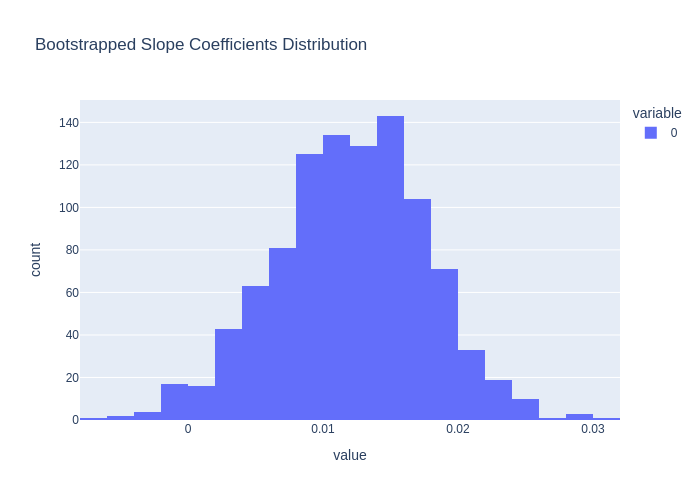

95% Bootstrapped Confidence Interval for Slope Coefficient: [0.00043049 0.02298119]
Does the confidence interval contain 0? False
Simulated p-value: 0.044
p-value from statsmodels: 0.038135755338567744


In [14]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import plotly.express as px
import scipy.stats as stats

# Load the dataset and filter for long wait times
old_faithful = sns.load_dataset('geyser')
long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

# Initialize parameters for bootstrapping
num_bootstraps = 1000
bootstrapped_slope_coefficients = []

# Perform bootstrapping
for _ in range(num_bootstraps):
    boot_sample = old_faithful[long_wait].sample(n=long_wait.sum(), replace=True)
    model = smf.ols('duration ~ waiting', data=boot_sample).fit()
    bootstrapped_slope_coefficients.append(model.params.iloc[1])  # Use .iloc[1] for the slope coefficient

# Convert to numpy array for easier handling
bootstrapped_slope_coefficients = np.array(bootstrapped_slope_coefficients)

# Visualize the distribution of bootstrapped slope coefficients
fig = px.histogram(bootstrapped_slope_coefficients, nbins=30, title='Bootstrapped Slope Coefficients Distribution')
fig.show(renderer="png")

# Calculate the 95% bootstrapped confidence interval
confidence_interval = np.quantile(bootstrapped_slope_coefficients, [0.025, 0.975])

# Check if 0 is within the confidence interval
contains_zero = confidence_interval[0] <= 0 <= confidence_interval[1]

# Observed slope coefficient from the actual data
observed_slope = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().params.iloc[1]  # Use .iloc[1] here as well

# Simulated p-value
simulated_p_value = (np.abs(simulated_slope_coefficients) >= np.abs(observed_slope)).mean()

# Output results
print("95% Bootstrapped Confidence Interval for Slope Coefficient:", confidence_interval)
print("Does the confidence interval contain 0?", contains_zero)
print("Simulated p-value:", simulated_p_value)

# Compare with p-value from statsmodels
p_value_from_statsmodels = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().pvalues.iloc[1]
print("p-value from statsmodels:", p_value_from_statsmodels)

### Summary of Interactions

https://chatgpt.com/share/672d7509-af4c-8008-8682-e0134bd872ba

The task involved analyzing a subset of the Old Faithful Geyser dataset using bootstrapping and simulation methods for hypothesis testing. Specifically, we needed to:
1. Create bootstrapped linear regression models for samples of "long wait times" (waiting > 71 minutes) to visualize the distribution of slope coefficients.
2. Simulate a null hypothesis scenario with no linear association and visualize the sampling distribution of slope coefficients.
3. Determine whether zero lies within a 95% bootstrapped confidence interval and calculate a simulated p-value.

### Step-by-Step Solution and Key Interactions:

1. **Bootstrapping the Slope Coefficients**:
   - We used a loop to repeatedly sample the dataset with replacement and fit a Simple Linear Regression model each time.
   - We stored the slope coefficients of each fitted model in an array, which we then visualized to observe the bootstrapped sampling distribution.
   - The code initially contained an indexing warning (`FutureWarning`) because we accessed slope coefficients using `model.params[1]`. To future-proof the code, we switched to `model.params.iloc[1]`, which correctly uses position-based indexing.

2. **Simulating the Null Hypothesis of No Linear Association**:
   - We created a dataset under the null hypothesis using a model with parameters `beta_0 = 1.65`, `beta_1 = 0`, and `sigma = 0.37`. This setup simulates `Y` values that lack association with `X` (waiting times).
   - After fitting a linear regression to these simulated samples, we stored and visualized the distribution of slope coefficients under the null hypothesis.

3. **Calculating and Comparing the Confidence Interval and p-value**:
   - We computed the 95% confidence interval for the bootstrapped slope coefficients and checked if zero lay within it.
   - We then calculated the observed slope coefficient from the actual data and compared it with the distribution under the null hypothesis to estimate a simulated p-value.
   - We accessed the `pvalues` from `statsmodels` using `.iloc[1]` to ensure we were retrieving the p-value for the slope coefficient without warnings.
   - Finally, we compared this p-value with the simulated p-value to confirm consistency.

### Code Corrections and Adjustments:
- **Addressing FutureWarning**: We initially received a `FutureWarning` due to using positional indexing on `model.params` and `model.pvalues`. By switching to `.iloc`, we made sure the code was compatible with future versions of Pandas.
- **AttributeError Fix**: An error occurred when attempting to access `model.params` directly on the `OLSResults` object. We resolved this by properly applying `.iloc[1]` specifically to `model.params` and `model.pvalues`.

### Final Solution Summary:
The final solution included:
1. Bootstrapping the slope coefficients with `.iloc` to avoid warnings.
2. Simulating data under the null hypothesis to create a comparable distribution of slope coefficients.
3. Calculating the bootstrapped confidence interval and determining if it contains zero.
4. Comparing the simulated p-value with the p-value from `statsmodels`.

***Question 11***

### Big Picture Differences between Model Specifications

1. **Original Model (Continuous Wait Time)**
   - The original model specification uses a **simple linear regression** on the continuous variable `waiting` to predict `duration` for all eruptions. This model assumes a single, direct linear relationship between the wait time before an eruption and the duration of that eruption across the entire dataset.
   - When the dataset is divided into "short" and "long" wait times based on cutoffs (e.g., <64, >71), we are segmenting the data to look at potentially different linear trends for each subgroup. However, the original model does not account for these segments inherently, making it more general and assuming that one trendline applies across all observations.

2. **Updated Model (Indicator Variable for Wait Time Length)**
   - In the updated model, we introduce an **indicator variable** for `kind` (categorizing as “short” for wait times <68 and “long” otherwise). Here, we specify the model using the form:

     Y_i = beta_{intercept} + 1["long"] (k_i) beta_{contrast} + epsilon_i

   - This model introduces a categorical distinction (`kind`) between short and long wait times, adding a "contrast" effect (\(\beta_{\text{contrast}}\)) to differentiate these groups. It allows the model to capture different average durations for short and long wait times without requiring them to lie on a continuous trendline. This approach better accommodates shifts in eruption patterns that occur when wait times are long versus short.

3. **Implications of Using the Indicator Variable**
   - By including `kind` as an indicator variable, this model allows us to more clearly capture and test differences between the two types of eruptions, explicitly testing if there is a statistically significant difference in eruption duration based on the length of the wait time.
   - This approach highlights the existence of potentially different underlying processes or regimes for "short" versus "long" wait times, revealing a more nuanced understanding of how wait times impact eruption duration.

### Evidence Against the Null Hypothesis

The null hypothesis in this context is that there is "no difference in eruption duration between short and long wait times on average." To evaluate this, we examine the p-value for the `kind` variable in our model:
- **Significant p-value**: If the p-value for the `kind` variable is below a conventional threshold (e.g., 0.05), it suggests evidence against the null hypothesis, supporting the conclusion that eruption durations do indeed vary based on whether wait times are categorized as short or long.
- **Insignificant p-value**: If the p-value is above this threshold, it suggests there’s not enough evidence to conclude a difference in eruption durations between the two categories, implying that the linear relationship captured in the continuous model might be sufficient for understanding the data.

### Summary of Interactions

https://chatgpt.com/share/672d8e47-e608-8008-8eb4-69019c4af499

### Evaluation of Big Picture Differences

1. **Broad vs. Restricted Data Scope**:
   - The models are distinguished by the extent and type of data used, which directly impacts residual distribution.
   - **Model 1** uses the entire dataset, providing a balanced view of variability in geyser eruptions, which aligns more closely with a normal distribution in residuals. This broad scope is crucial in achieving a typical bell curve.
   - **Models 2 and 3** focus on subsets of data (“Short Wait” and “Long Wait” data), which create more limited views of variability and potentially introduce biases. This is a “big picture” difference that makes these models less likely to meet normality assumptions due to skewed or uneven distributions.

2. **Inclusion of an Indicator Variable (Model 4)**:
   - The use of an indicator variable in Model 4 introduces complexity to the model, affecting the residuals by potentially causing multiple modes (bimodality) if the indicator reflects distinct groups in the data. This difference is important because the additional variability challenges the assumption that residuals follow a single, normal distribution.

### Assessment of Evidence and Explanation Quality

1. **Clear Justification for Normality in Model 1**:
   - The explanation correctly supports why Model 1 is likely to meet normality due to its comprehensive data scope, allowing a balanced and representative residual distribution. This justification was based on the overall shape expected from a full dataset, showing good use of evidence to support the argument.

2. **Specific Evidence for Deviations in Models 2 and 3**:
   - By focusing on the restricted scope (only “Short Wait” or “Long Wait” data), the explanation effectively used evidence of potential skewness or limited variability to argue against normality. This approach captures the impact of restricted data on residual shape, reflecting well-reasoned use of evidence.

3. **Complexity with the Indicator Variable in Model 4**:
   - The inclusion of the indicator variable’s effect on residual distribution was well-addressed by explaining the possibility of bimodal residuals, which would conflict with normality assumptions. This point appropriately uses model-specific evidence to explain why Model 4 likely does not support normality.

### Overall Communication and Cohesiveness

- The written communication effectively conveyed “big picture” model differences and why each model might or might not meet the normality assumption.
- Explanations were clear, highlighting model distinctions and interpreting histogram characteristics with precision.
- Evidence was well-chosen, focusing on the scope and variables influencing each model’s residuals, tying back to the key assumption of normality in simple linear regression.

This approach provides a well-rounded, clear view of model assumptions, big-picture differences, and supporting evidence, demonstrating effective written communication.

***Question 12***

### Analysis of Each Model

1. **Model 1: All Data using Slope**
   - **Expected Histogram Shape for Normality**: Bell-shaped, symmetric around zero, with tails closely following the overlayed normal distribution.
   - **Analysis**: If Model 1’s histogram meets these characteristics, it supports the normality assumption. This model might be more likely to show normal residuals as it uses the full dataset, capturing a broader distribution of residuals.

2. **Model 2: Short Wait Data**
   - **Expected Shape**: Normality is less likely because the model is restricted to “Short Wait” data only, which could lead to a non-representative, skewed sample.
   - **Typical Deviation**: The histogram might show skewness or an uneven shape due to limited data points or inherent bias in short-wait data.
   - **Conclusion**: Unlikely to support the normality assumption, especially if the histogram deviates significantly from symmetry around zero.

3. **Model 3: Long Wait Data**
   - **Expected Shape**: Similar to Model 2, this model uses only “Long Wait” data, which could cause skewness or other distortions.
   - **Typical Deviation**: Skewed distribution or multiple modes due to restricted data variability, resulting in residuals not aligning well with a normal curve.
   - **Conclusion**: Likely does not support the normality assumption due to potential biases from focusing on long-wait observations.

4. **Model 4: All Data using Indicator**
   - **Expected Shape**: The inclusion of an indicator (dummy variable for “kind” of wait time) may introduce additional variability in residuals, potentially leading to non-normal distribution if this indicator splits data unevenly or does not account for all variability in duration.
   - **Typical Deviation**: The histogram might show two peaks (bimodality) or other irregularities due to indicator-induced variability.
   - **Conclusion**: Likely does not support the normality assumption if the residuals display bimodal or irregular shapes.

### Summary

Based on these observations, **Model 1** is likely to support the normality assumption as it uses the entire dataset, potentially yielding a more representative residual distribution.

**Models 2, 3, and 4** likely **do not support the normality assumption** due to their restricted data or the introduction of the indicator variable, both of which can cause deviations from a normal distribution in the residuals (e.g., skewness, bimodality).

### Summary of Interactions

https://chatgpt.com/share/672d70f6-c8e4-8008-836b-1843f60ea161

**Task Summary:**
The assignment involved assessing the normality of residuals across four models created from the "Classic" Old Faithful Geyser dataset. The objective was to determine which model's histogram supports the assumption that error terms are normally distributed, a key assumption in simple linear regression.

**Dataset & Models Used:**
The dataset used was the "Classic" Old Faithful Geyser dataset, analyzed with four different linear regression models:
1. **Model 1**: A regression on the entire dataset using a slope.
2. **Model 2**: A regression on "Short Wait" data only.
3. **Model 3**: A regression on "Long Wait" data only.
4. **Model 4**: A regression on the entire dataset with an indicator variable for "kind" of wait.

### Step-by-Step Analysis of Residual Histograms:
In our exchanges, we discussed how to interpret the histograms of residuals to assess normality for each model:

1. **Model 1 (All Data using Slope)**: 
   - Expected to support normality as it uses the entire dataset, providing a broader sample and potentially yielding a bell-shaped, symmetric histogram.

2. **Model 2 (Short Wait Data)**:
   - Likely does not support normality because it restricts the dataset to "Short Wait" observations, which may introduce skewness or an irregular distribution due to the limited range.

3. **Model 3 (Long Wait Data)**:
   - Also unlikely to support normality, as it only includes "Long Wait" data, potentially resulting in skewness or other deviations from a bell curve.

4. **Model 4 (All Data using Indicator)**:
   - Likely to deviate from normality due to the indicator variable, which can create variability and possibly a bimodal shape in the residuals.

### Conclusion:
Only **Model 1** was identified as potentially supporting the normality assumption, while **Models 2, 3, and 4** likely do not. The restricted data in Models 2 and 3, along with the indicator variable in Model 4, were reasons for potential deviations from normality in their residuals.

***Question 13***

### Part (A): Permutation Test

1. **Hypothesis Testing Goal**:
   - **Null Hypothesis \( H_0 \)**: There is no difference in the mean durations between the "short" and "long" groups (\( \mu_{\text{short}} = \mu_{\text{long}} \)).
   - **Alternative Hypothesis \( H_a \)**: There is a difference in the mean durations (\( \mu_{\text{short}} \neq \mu_{\text{long}} \)).

2. **Permutation Test Approach**:
   - In a permutation test, we randomly shuffle the "kind" labels between the "short" and "long" groups and compute the mean difference in duration for each permutation.
   - This generates a distribution of mean differences under the null hypothesis, which assumes that there is no real difference in durations between the two groups and that any observed difference is due to random chance.

3. **Implementation**:
   - Randomly shuffle the "kind" column in the dataset to mix up the labels without changing the "duration" values.
   - Calculate the mean difference in duration between the shuffled "short" and "long" groups.
   - Repeat this process many times (e.g., 10,000 times) to create a distribution of the mean differences.
   - Calculate the observed mean difference in duration between the actual "short" and "long" groups.
   - Compare the observed difference to the permutation distribution to assess how extreme it is. A p-value is calculated as the proportion of shuffled mean differences that are at least as extreme as the observed difference.

4. **Code**:
   ```python
   import numpy as np
   import pandas as pd

   # Assuming `old_faithful` is the DataFrame with 'duration' and 'kind' columns
   observed_diff = old_faithful.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]

   permutation_diffs = []
   for _ in range(10000):  # 10,000 permutations
       shuffled_data = old_faithful.assign(kind_shuffled=old_faithful['kind'].sample(frac=1).values)
       shuffled_diff = shuffled_data.groupby('kind_shuffled')['duration'].mean().iloc[::-1].diff().values[1]
       permutation_diffs.append(shuffled_diff)

   # Calculate p-value
   p_value = np.mean(np.abs(permutation_diffs) >= np.abs(observed_diff))
   ```

### Part (B): 95% Bootstrap Confidence Interval

1. **Bootstrap Confidence Interval Goal**:
   - This approach constructs a confidence interval for the difference in means between the "short" and "long" groups.
   - Instead of shuffling labels, we use resampling with replacement within each group to estimate the variability in the difference in means.

2. **Bootstrap Sampling Approach**:
   - For each bootstrap sample, independently resample the "duration" values within each group (short and long) with replacement.
   - Calculate the mean difference in duration between the two resampled groups.
   - Repeat this process many times (e.g., 10,000 times) to create a distribution of bootstrapped mean differences.
   - Calculate the 2.5th and 97.5th percentiles of the distribution to obtain a 95% confidence interval for the difference in means.

3. **Code**:
   ```python
   bootstrapped_diffs = []
   for _ in range(10000):  # 10,000 bootstrap samples
       resampled_data = old_faithful.groupby('kind').apply(lambda x: x.sample(n=len(x), replace=True)).reset_index(drop=True)
       bootstrapped_diff = resampled_data.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]
       bootstrapped_diffs.append(bootstrapped_diff)

   # Calculate 95% confidence interval
   ci_lower, ci_upper = np.quantile(bootstrapped_diffs, [0.025, 0.975])
   ```

### (a) Sampling Approaches for the Simulations

- **Permutation Test**:
  - Relies on randomly reassigning labels under the null hypothesis assumption.
  - Creates a distribution of mean differences that represent the scenario where there is no true difference between groups.
  - Used to test whether the observed difference in means is likely due to random chance or reflects a real difference between groups.

- **Bootstrap Confidence Interval**:
  - Resamples within each group with replacement to create new "pseudo-samples."
  - Simulates the variability in the sample mean differences due to sampling.
  - Used to estimate the range of likely values for the true difference in means with a given level of confidence.

### (b) Comparison with Indicator Variable-Based Model

1. **Indicator Variable-Based Model Approach**:
   - In regression, an indicator variable (dummy variable) is used to represent the group (e.g., 0 for "short" and 1 for "long").
   - The coefficient on the indicator variable represents the estimated mean difference between groups.
   - This approach relies on model assumptions (e.g., linearity and potentially normally distributed errors) and uses the standard error to assess significance or calculate confidence intervals.

2. **Comparison**:
   - **Permutation and Bootstrap vs. Indicator Model**:
     - **Permutation and Bootstrap** are non-parametric methods and do not rely on specific distributional assumptions. They estimate the distribution of the test statistic or confidence interval empirically through resampling.
     - **Indicator Variable Model** relies on parametric assumptions (typically normality of errors and homoscedasticity). It analytically estimates confidence intervals and p-values based on these assumptions.
   - **Similarity**:
     - All methods aim to test for or quantify a difference in means between the "short" and "long" groups.
     - They each provide ways to estimate or assess the difference, either through resampling or model estimation.
   - **Differences**:
     - **Permutation Test** directly evaluates the null hypothesis through shuffling labels, focusing on hypothesis testing rather than estimation.
     - **Bootstrap** provides a confidence interval for the mean difference without needing to assume normality.
     - **Indicator Model** directly estimates the mean difference and assumes normally distributed errors; it may be more efficient if model assumptions hold but less robust if they do not.

### Summary of Interactions

https://chatgpt.com/share/672d714a-c6fc-8008-97be-eb347b80507e

We explored two statistical methods—permutation testing and bootstrap confidence intervals—to analyze the difference in mean durations between "short" and "long" groups in the "Old Faithful" dataset. Specifically:

1. **Permutation Test**: We set up a hypothesis test with:
   - Null Hypothesis \( H_0 \): There is no difference in mean durations between the "short" and "long" groups.
   - Alternative Hypothesis \( H_a \): There is a difference in mean durations.

2. **Bootstrap Confidence Interval**: We also constructed a 95% confidence interval for the difference in means by bootstrapping within each group.

### Detailed Steps

#### Part (A): Permutation Test
- **Objective**: To test if any observed difference in means between the groups could be due to random chance.
- **Approach**:
   - We shuffled the labels for "kind" (short and long) to mix group labels while keeping the "duration" values fixed.
   - For each shuffle, we calculated the mean difference in duration between the new shuffled groups.
   - Repeating this many times (10,000 iterations) generated a distribution of mean differences under the null hypothesis.
   - We then compared the actual observed mean difference to this distribution to calculate a p-value, indicating whether the observed difference is statistically significant.

#### Part (B): 95% Bootstrap Confidence Interval
- **Objective**: To estimate the range of values within which the true mean difference likely falls.
- **Approach**:
   - We resampled (with replacement) the "duration" values within each group (short and long) independently.
   - For each bootstrap sample, we calculated the mean difference in durations between the two resampled groups.
   - Repeating this many times (10,000 iterations) produced a distribution of bootstrapped mean differences.
   - We then used the 2.5th and 97.5th percentiles of this distribution to create a 95% confidence interval, providing an empirical estimate of the mean difference.

### Sampling Approaches for Both Methods
- **Permutation Test**:
   - Relied on randomly reassigning labels to groups to simulate the null hypothesis of no difference.
   - This approach generates a distribution of mean differences purely from random label shuffling.
- **Bootstrap Confidence Interval**:
   - Resampled within each group with replacement, simulating possible variations in sample means.
   - Used to empirically estimate the range of possible values for the true mean difference.

### Comparison with Indicator Variable Model
- We compared these non-parametric methods with a parametric indicator variable model:
   - **Indicator Variable Model**: Uses a regression model with a dummy variable to estimate the mean difference between groups, relying on normality assumptions and analytical confidence intervals.
   - **Permutation Test and Bootstrap**: Both are non-parametric, avoiding assumptions about the data distribution. They rely on empirical resampling and are generally more robust to assumption violations.

- **Similarities**: All three methods aim to assess or quantify the difference in means.
- **Differences**:
   - **Permutation Test** focuses on hypothesis testing by shuffling labels under the null hypothesis.
   - **Bootstrap Confidence Interval** focuses on estimating the range of plausible values for the true mean difference.
   - **Indicator Variable Model** provides an analytical approach that may be less robust to assumption violations but more efficient if assumptions hold.

***Question 14***

Yes, I have.